Setup the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
import copy as copy
from simulation import Simulation, Parameters, Results

Define a function to run a simulation

In [2]:
def run_sim(params):
    sim = Simulation()
    sim.set_parameters(parameters=params)
    start = time.time()
    sim.run()
    end = time.time()
    duration = end-start
    return sim.get_results(), duration

Benchmarks

In [11]:
iterations = 20
max_days = 15
parameters = 'testing/data/benchmarking.json'
total_s = []
total_p = []

Execution Mode Comparison (Time)

Serial: 7.234732663631439s
Parallel: 4.100748181343079s
Speed up: 43.31859417615677s


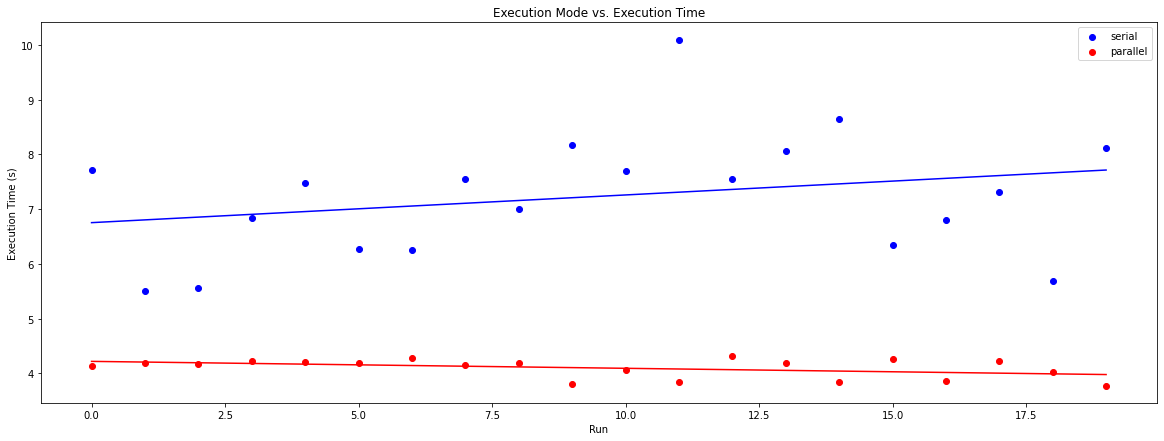

In [4]:
fig, ax = plt.subplots(figsize=(20, 7))

params = Parameters(filename=parameters)
seeds = np.random.randint(0, 100000, iterations)

serials = []
parallels = []

for i, s in enumerate(seeds):
    params.seed = s
    params.mode = 'serial'
    start = time.time()
    r, t_s = run_sim(params=params)
    end = time.time()
    # print(f'Serial: {end-start}')
    serials.append(t_s)
    total_s.append(t_s)

    params.mode = 'multiprocessing'
    start = time.time()
    r, t_p = run_sim(params=params)
    end = time.time()
    parallels.append(t_p)
    total_p.append(t_p)
    # print(f'Parallel: {end-start}')
    # print(f'Completed {i}')

x = np.arange(len(serials))
ax.scatter(x, serials, color='blue', label='serial')
ax.scatter(x, parallels, color='red', label='parallel')

if len(serials) > 1:
    a, b = np.polyfit(x, serials, 1)
    ax.plot(x, x*a+b, color='blue')

    a, b = np.polyfit(x, parallels, 1)
    ax.plot(x, x*a+b, color='red')

avg_s = np.average(serials)
print(f'Serial: {avg_s}s')
avg_p = np.average(parallels)
print(f'Parallel: {avg_p}s')
print(f'Speed up: {abs(avg_p - avg_s) / avg_s * 100}s')

ax.set_title('Execution Mode vs. Execution Time')
ax.set_xlabel('Run')
ax.set_ylabel('Execution Time (s)')
plt.legend()
plt.show()

Serial: 7.234732663631439s
Parallel: 4.100748181343079s
Speed up: 43.31859417615677s


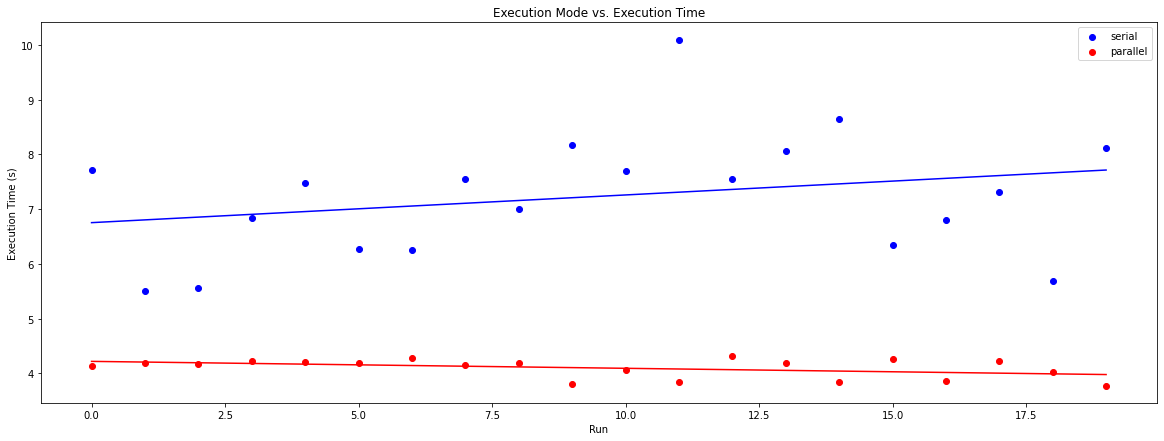

In [5]:
fig, ax = plt.subplots(figsize=(20, 7))

x = np.arange(len(total_s))
ax.scatter(x, total_s, color='blue', label='serial')
ax.scatter(x, total_p, color='red', label='parallel')

if len(total_s) > 1:
    a, b = np.polyfit(x, total_s, 1)
    ax.plot(x, x*a+b, color='blue')

    a, b = np.polyfit(x, total_p, 1)
    ax.plot(x, x*a+b, color='red')

avg_s = np.average(total_s)
print(f'Serial: {avg_s}s')
avg_p = np.average(total_p)
print(f'Parallel: {avg_p}s')
print(f'Speed up: {abs(avg_p - avg_s) / avg_s * 100}s')

ax.set_title('Execution Mode vs. Execution Time')
ax.set_xlabel('Run')
ax.set_ylabel('Execution Time (s)')
plt.legend()
plt.show()

Execution Mode Comparison (Cases)

In [6]:
def count_cases(data):
    total = 0
    for k, v in data.items():
        for k2, v2 in v.items():
            if k2 not in ['passed', 'sus']:
                total += v2

    return total

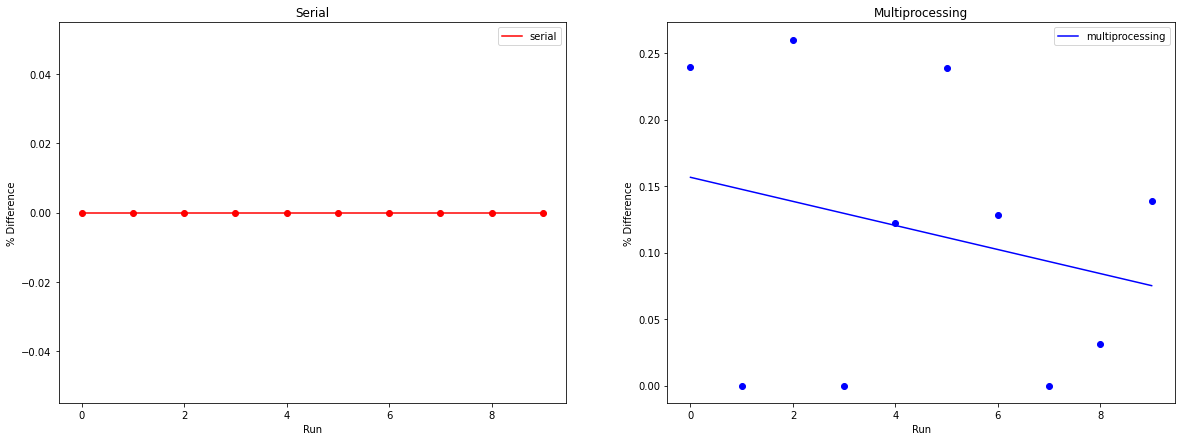

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 7))
ax = ax.flatten()
iterations = 10

params = Parameters(filename=parameters)
seeds = np.random.randint(0, 100000, iterations)

averages = {'serial': [], 'multiprocessing': []}

for i, (m, c) in enumerate([('serial', 'r'), ('multiprocessing', 'b')]):
    params.mode = m
    for j, seed in enumerate(seeds):
        params.seed = seed
        r, t_s = run_sim(params=params)
        cases = r.get('states')
        total1 = count_cases(cases)
        
        r, t_s = run_sim(params=params)
        cases = r.get('states')
        total2 = count_cases(cases)

        diff = abs(total1 - total2)
        perc_diff = diff / max(total1, total2) * 100
        ax[i].scatter(j, perc_diff, c=c)
        averages[m].append(perc_diff)

xvals = np.arange(len(averages['serial']))
a, b = np.polyfit(xvals, averages['serial'], 1)
ax[0].plot(xvals, a*xvals+b, c='r', label='serial')

xvals = np.arange(len(averages['multiprocessing']))
a, b = np.polyfit(xvals, averages['multiprocessing'], 1)
ax[1].plot(xvals, a*xvals+b, c='b', label='multiprocessing')

ax[0].set_title('Serial')
ax[0].set_xlabel('Run')
ax[0].set_ylabel('% Difference')

ax[1].set_title('Multiprocessing')
ax[1].set_xlabel('Run')
ax[1].set_ylabel('% Difference')

ax[0].legend()
ax[1].legend()
plt.show()

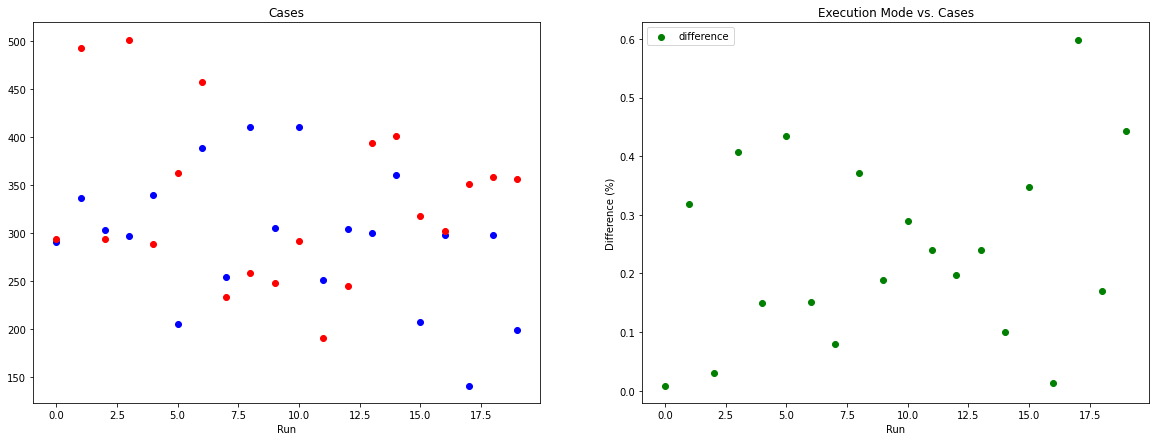

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 7))
ax = ax.flatten()

params = Parameters(filename=parameters)
seeds = np.random.randint(0, 100000, iterations)

serials = []
parallels = []

for i, s in enumerate(seeds):
    params.mode = 'serial'
    

    params.mode = 'multiprocessing'
    r, t_p = run_sim(params=params)
    cases = r.get('states')
    total = count_cases(cases)
    parallels.append(total)

x = np.arange(len(serials))
ax[0].scatter(x, serials, color='blue', label='serial')
ax[0].scatter(x, parallels, color='red', label='parallel')
ax[0].set_title('Execution Mode vs. Cases')
ax[0].set_xlabel('Run')
ax[0].set_title('Cases')

difference = np.absolute(np.array(serials) - np.array(parallels))
difference_perc = np.divide(difference, np.maximum(serials, parallels))
ax[1].scatter(x, difference_perc, color='green', label='difference')
ax[1].set_title('Execution Mode vs. Cases')
ax[1].set_xlabel('Run')
ax[1].set_ylabel('Difference (%)')

plt.legend()
plt.show()

Execution Mode (Days)

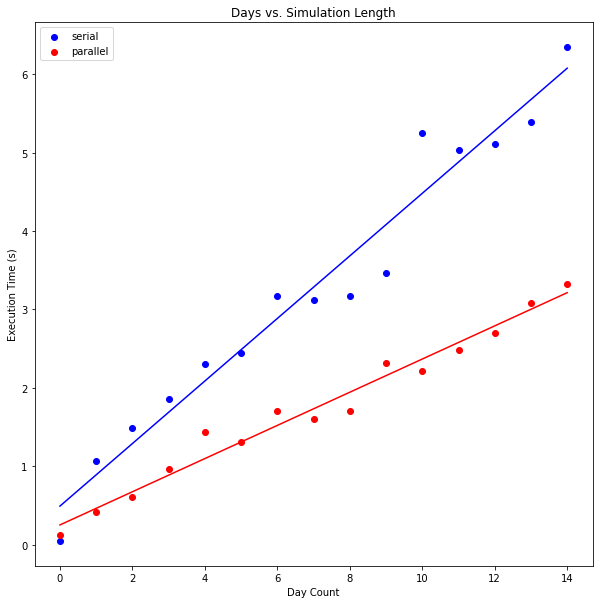

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

params = Parameters(filename=parameters)

days = []
serials = []
parallels = []

for i in range(max_days):
    params.days = i
    days.append(i)

    params.mode = 'serial'
    start = time.time()
    r, t_s = run_sim(params=params)
    end = time.time()
    serials.append(t_s)

    params.mode = 'multiprocessing'
    start = time.time()
    r, t_p = run_sim(params=params)
    end = time.time()
    parallels.append(t_p)

ax.scatter(days, serials, color='blue', label='serial')
ax.scatter(days, parallels, color='red', label='parallel')

if len(serials) > 1:
    days = np.array(days)
    a, b = np.polyfit(days, serials, 1)
    ax.plot(days, days*a+b, color='blue')
    print(f'Growth serial: {a}')

    a, b = np.polyfit(days, parallels, 1)
    ax.plot(days, days*a+b, color='red')
    print(f'Growth parallel: {a}')

ax.set_title('Days vs. Simulation Length')
ax.set_xlabel('Simulation Length')
ax.set_ylabel('Execution Time (s)')
plt.legend()
plt.show()